In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Definição de estilo de tabela do Pandas

headers = {
    "selector": "th:not(.index_name)",
    "props": "background-color: #02607a; color: white; text-align: center"
}
properties = {"border": "1px solid black", "width": "400px", "height": "30px", "text-align": "center"}

In [14]:
dataset = pd.read_csv("data/dataset_ac_caixa.csv")

In [4]:
dataset.head(n=10).style.hide()

Polo,Nota/AC
recife,42
recife,43
recife,43
recife,46
recife,42
recife,43
recife,44
recife,42
recife,44
recife,51


## Estatísticas gerais por polo


In [5]:

dataset.groupby('Polo').describe(percentiles=[.9,.95,.99]).style.format(precision=2).set_table_styles([headers]).set_properties(**properties)


## Menor nota dentre todos os polos

In [6]:
dataset["Nota/AC"].min()

31

## Maior nota dentre todos os polos

In [7]:
dataset["Nota/AC"].max()

55

## Histograma de notas


(array([ 36.,  69., 425., 317., 270., 225.,  58.,  43.,   4.,   1.]),
 array([31. , 33.4, 35.8, 38.2, 40.6, 43. , 45.4, 47.8, 50.2, 52.6, 55. ]),
 <BarContainer object of 10 artists>)

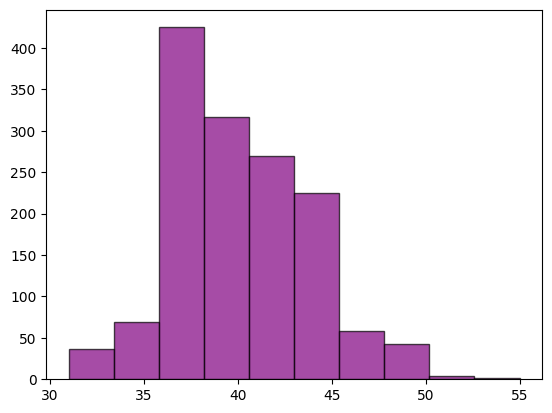

In [8]:
# Histograma de notas
plt.hist(dataset["Nota/AC"],bins=10,color='purple',align='mid',alpha=0.7, edgecolor='black')

In [9]:
def boxplot_notas_uf(verify_pct=False):
    cores = ['red', 'blue', 'green', 'purple', 'orange', 'black', 'grey'] 

    fig, ax = plt.subplots(figsize=(10, 10))

    grupos = dataset['Polo'].unique()

    for i, grupo in enumerate(grupos):
        data = dataset[dataset['Polo'] == grupo]['Nota/AC'] 
        if verify_pct == True:
            data = ((dataset[dataset['Polo'] == grupo]['Nota/AC'])/60) * 100
        bp = ax.boxplot(data, positions=[i], patch_artist=True, widths=0.6)
        for box in bp['boxes']:
            box.set_facecolor(cores[i % len(cores)])
        outliers = bp['fliers'][0].get_ydata()
        for outlier in outliers:
            ax.annotate(f'{outlier:.2f}', xy=(i, outlier), xytext=(i + 0.1, outlier),
                        textcoords='data', fontsize='medium', color='black')

    ax.set_xticks(range(len(grupos)))
    ax.set_xticklabels(grupos, fontsize='large')
    ax.set_title('Boxplot de Nota/AC por Polo', fontsize='x-large')
    if verify_pct == True:
        ax.set_title('Distribuição de porcentagem de acertos por polo', fontsize='x-large')
    ax.set_ylabel('Nota/AC', fontsize='large')
    ax.set_xlabel('Polo', fontsize='large')
    ax.grid(visible=True)

    plt.show()

## Distribuição de nota por polo

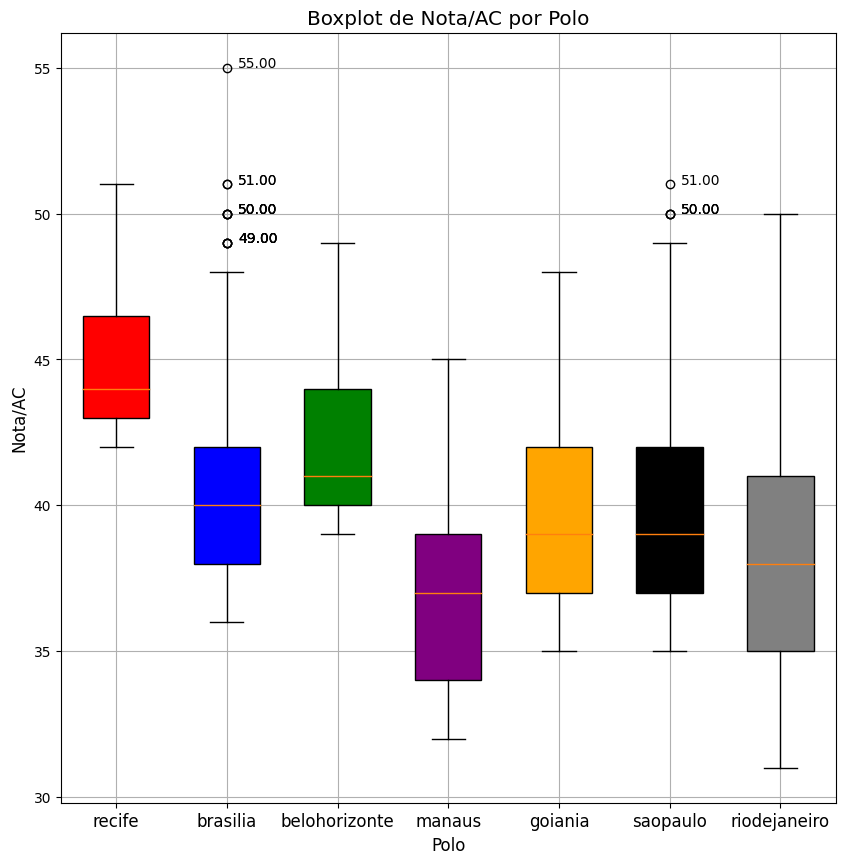

In [10]:
boxplot_notas_uf()

## Distribuição de porcentagem de acertos por polo

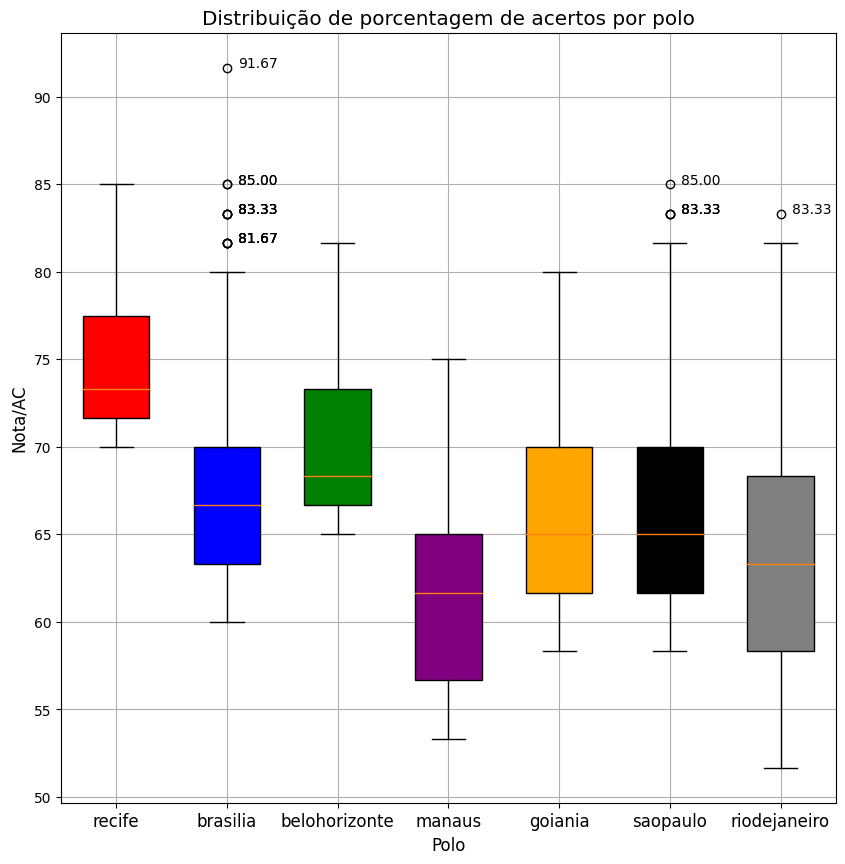

In [11]:
boxplot_notas_uf(verify_pct=True)

In [12]:
len(dataset)

1448

## Porcentagem de acertos em geral

In [13]:
contagem_candidatos = len(dataset)
soma_aprov_maior_igual_90 = 0
soma_aprov_maior_igual_80_menor_90 = 0
soma_aprov_maior_igual_70_menor_80 = 0
soma_aprov_maior_igual_60_menor_70 = 0
soma_aprov_maior_igual_50_menor_60 = 0

for nota in list(dataset["Nota/AC"]):
    if nota/60 >= 0.9:
        soma_aprov_maior_igual_90 +=1
    elif nota/60 >= 0.8 and nota/60 < 0.9:
        soma_aprov_maior_igual_80_menor_90 +=1
    elif nota/60 >= 0.7 and nota/60 < 0.8:
        soma_aprov_maior_igual_70_menor_80 +=1
    elif nota/60 >= 0.6 and nota/60 < 0.7:
        soma_aprov_maior_igual_60_menor_70 +=1
    elif nota/60 >= 0.5 and nota/60 < 0.6:
        soma_aprov_maior_igual_50_menor_60 +=1
    
pct_dict = {'Porcentagem de acerto': 
            ["90% - 100%", 
             "80% - 89%", 
             "70% - 79%", 
             "60% - 69%",
             "50% - 59%"], 
            'Frequência': [soma_aprov_maior_igual_90,
                           soma_aprov_maior_igual_80_menor_90,
                           soma_aprov_maior_igual_70_menor_80,
                           soma_aprov_maior_igual_60_menor_70,
                           soma_aprov_maior_igual_50_menor_60],
            'Frequência (pct)': [
                (soma_aprov_maior_igual_90/contagem_candidatos)*100,
                (soma_aprov_maior_igual_80_menor_90/contagem_candidatos)*100,
                (soma_aprov_maior_igual_70_menor_80/contagem_candidatos)*100,
                (soma_aprov_maior_igual_60_menor_70/contagem_candidatos)*100,
                (soma_aprov_maior_igual_50_menor_60/contagem_candidatos)*100
            ]}

df_pct = pd.DataFrame.from_dict(pct_dict)

df_pct.style.format(precision=2).set_table_styles([headers]).set_properties(**properties).hide()


Porcentagem de acerto,Frequência,Frequência (pct)
90% - 100%,1,0.07
80% - 89%,47,3.25
70% - 79%,415,28.66
60% - 69%,880,60.77
50% - 59%,105,7.25
